In [164]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [165]:
head = ['tid', 'tstart', 'tend', 'query', 'time']
gendata = pd.read_csv("D:\elastic-hurryup\db\gendata.txt", sep=',', names=head)

In [166]:
gendata['keysize'] = gendata['query'].str.count('\+')
gendata['keysize'] = gendata['keysize'] + 1

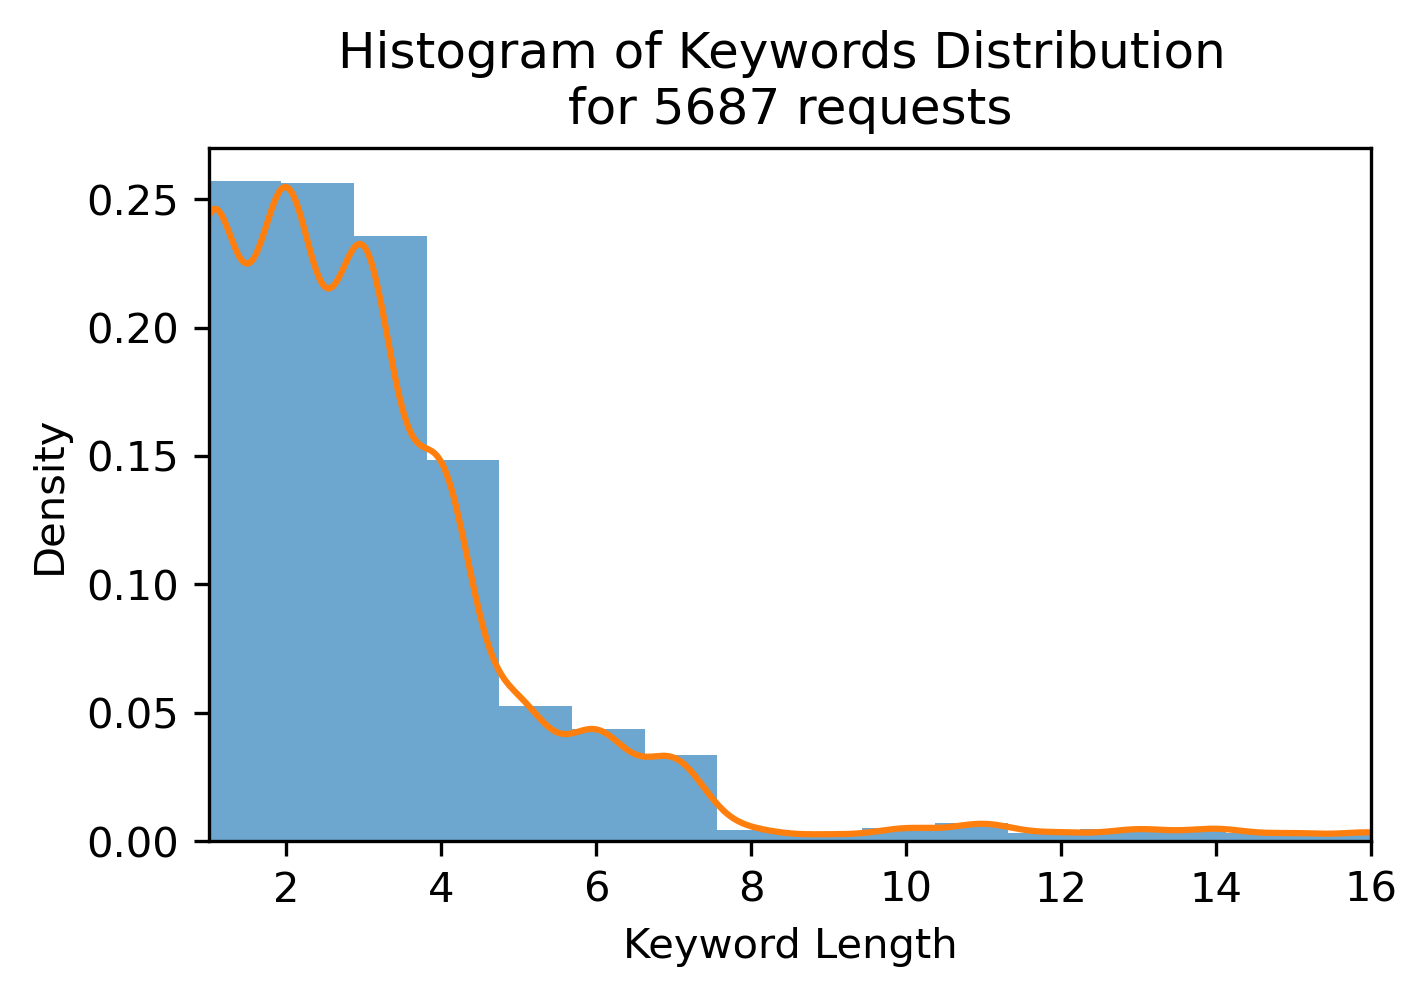

In [75]:
plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(5,3), dpi=300)
plt.title('Histogram of Keywords Distribution \nfor 5687 requests')
ax.set_xlabel('Keyword Length')
#gendata['keysize'].hist(bins=16)
gendata['keysize'].plot(kind = "hist", density = True, bins = 16, alpha = 0.65) # change density to true, because KDE uses density
gendata['keysize'].plot(kind = "kde")
ax.set_xlim(1,16)
plt.style.use("default")
plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\paper_graphs\\keywords_histogram.png')

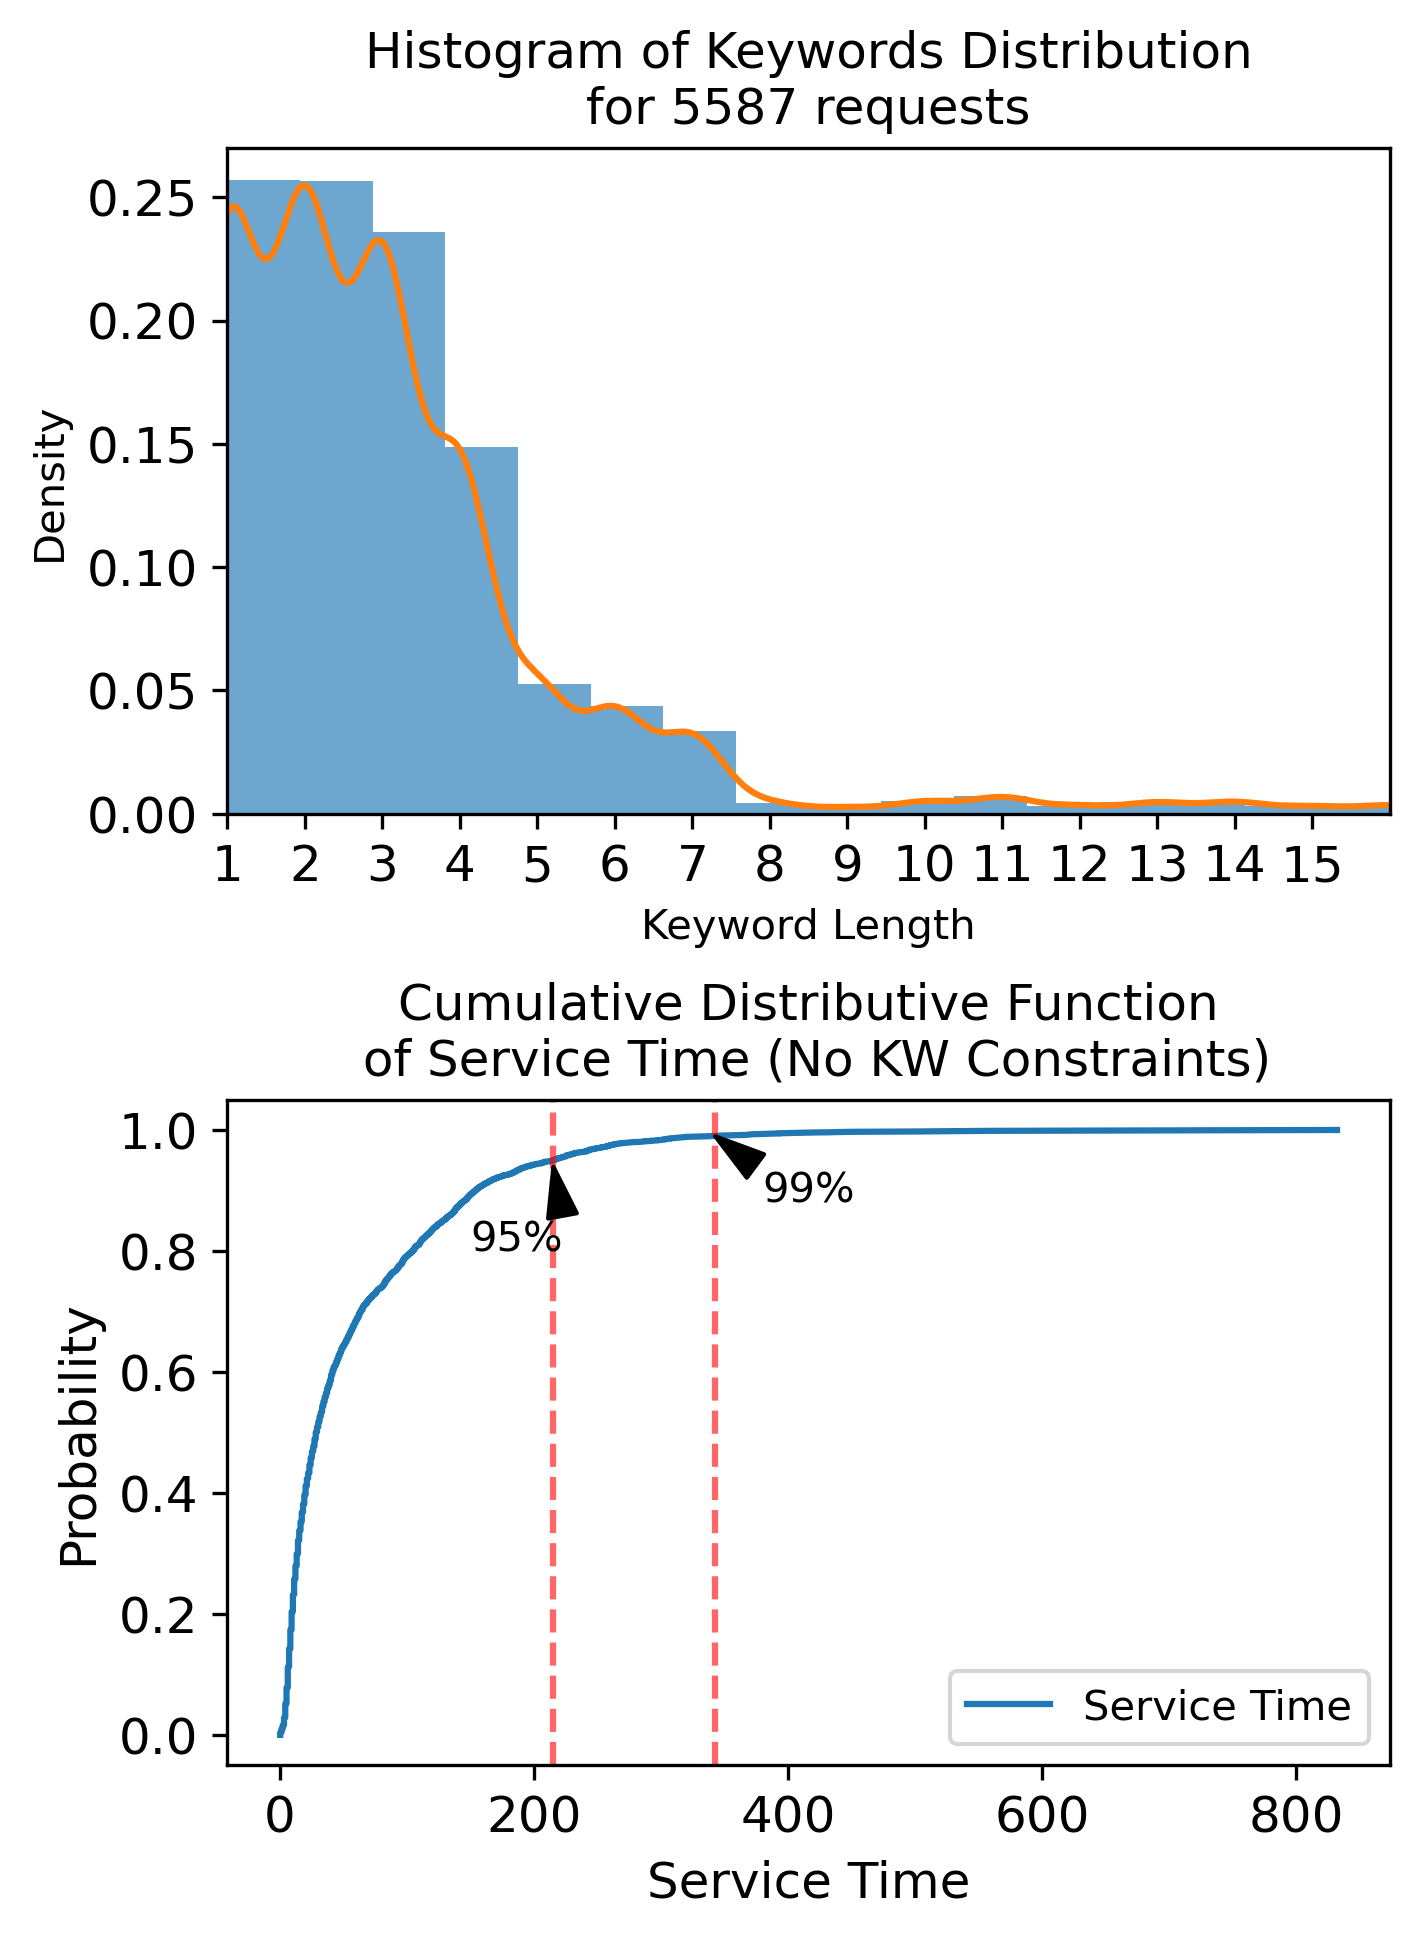

In [177]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon

plt.close('all')
fig, axs = plt.subplots(2, 1, figsize=(5,7), dpi=300)

ax1 = axs[0]
ax1.set_title('Histogram of Keywords Distribution\nfor 5587 requests')
ax1.set_xlabel('Keyword Length')
#gendata['keysize'].hist(bins=16)
gendata['keysize'].plot(kind = "hist", density = True, bins = 16, alpha = 0.65, ax=ax1) # change density to true, because KDE uses density
gendata['keysize'].plot(kind = "kde", ax=ax1)
ax1.set_xlim(1,16)
ax1.set_xticks(np.arange(1, 16, step=1))  
ax2 = axs[1]
# Read
took_ms = np.array(gendata['time'].values.tolist())
#bigProb['took_ms'] = np.where(took_ms > 3000, 3000, took_ms).tolist()
#took_ms = np.array(smallProb['took_ms'].values.tolist())
#smallProb['took_ms'] = np.where(took_ms > 3000, 3000, took_ms).tolist()

# CDF Code

N = 5586
A = gendata['time']


H,X1 = np.histogram(A, bins = 10, density = True)
X2 = np.sort(A)
F2 = np.array(range(N))/float(N)
markers_on = np.percentile(gendata['time'], 95)
ax2.plot(X2, F2, label='Service Time')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

#fig = plt.figure(1, figsize=(10, 6))
fig.subplots_adjust(hspace=0.43)
legend = ax2.legend(loc='lower right')
ax2.set_xlabel('Service Time', size='large')
ax2.set_ylabel('Probability', size='large')
ax2.set_title('Cumulative Distributive Function\n of Service Time (No KW Constraints)')
ax2.annotate('95%', xy=(np.percentile(gendata['time'], 95), 0.94), xytext=(150,0.8),
            arrowprops=dict(facecolor='black', width=1, headwidth=7, shrink=0.01),
            )
ax2.annotate('99%', xy=(np.percentile(gendata['time'], 99), 0.99), xytext=(380,0.88),
            arrowprops=dict(facecolor='black', width=1, headwidth=7, shrink=0.01),
            )
ax2.axvline(x=np.percentile(gendata['time'], 95), c='r', linestyle='--', alpha=0.6)
ax2.axvline(x=np.percentile(gendata['time'], 99), c='r', linestyle='--', alpha=0.6)

plt.show()
fig.tight_layout()
fig.savefig('D:\\elastic-hurryup\\graphs\\paper_graphs\\new_keywords_histogram.png', bbox_inches='tight')

In [179]:
np.percentile(gendata['time'], 99)

342.14999999999964

In [168]:
gendata['keysize'].idxmax()

221

In [169]:
gendata['keysize'][221]

16.0